# MNIST Digit Classification

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 30-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

---

## Project Overview

In this project, we’re building a Convolutional Neural Network (CNN) model to classify hand-written digits (0–9) from the MNIST dataset. The MNIST dataset contains 60,000 training images and 10,000 test images, each of which is a 28x28 grayscale image of a single digit. Our goal is to accurately classify these images using deep learning techniques.

### Steps Involved:
1. **Data Loading and Exploration**  
2. **Data Preprocessing**: Reshaping, normalizing, and converting labels to categorical data.
3. **Model Building**: Constructing a CNN model for image classification.
4. **Model Training and Evaluation**: Training the model, evaluating its performance, and analyzing results.
5. **Model Visualization**: Visualizing training and validation accuracy and loss.
6. **Model Testing**: Making predictions and analyzing results with confusion matrix and classification report.

---

## 1. Import Libraries

In [44]:
# importing the necessary libraries
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [45]:
# loading the dataset from Keras website
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. Dataset Exploration
Let’s examine the shape of the dataset and visualize an example image.

In [46]:
# Checking the shape of the dataset
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (60000, 28, 28), (60000,)
Testing data shape: (10000, 28, 28), (10000,)


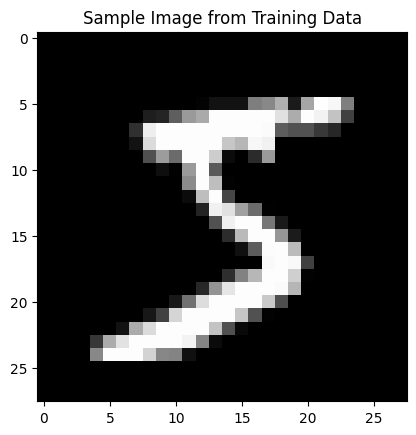

In [47]:
# Plotting some example images
plt.imshow(x_train[0], cmap='gray')
plt.title("Sample Image from Training Data")
plt.show()

## 4. Data Preprocessing

In [48]:
# Reshaping and Normalizing
x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0

In [49]:
# One-Hot Encoding Labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 5. Model Building
### CNN Architecture:
1. Conv2D Layers: To detect patterns and features in the image.
2. MaxPooling Layers: To reduce the size of the data and retain important features.
3. Flatten: Transform the data into a one dimensional vector for the Dense layer.
4. Dense Layers: Fully connected layers for decision making.
5. Dropout Layer: Prevents overfitting by randomly ignoring some nodes during training.

In [50]:
# Creating the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 6. Model Training
Using 10 epochs for initial training.

In [51]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8908 - loss: 0.3505 - val_accuracy: 0.9850 - val_loss: 0.0460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9814 - loss: 0.0593 - val_accuracy: 0.9879 - val_loss: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9868 - val_loss: 0.0398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9885 - val_loss: 0.0361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9903 - val_loss: 0.0292
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9913 - val_loss: 0.0298
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9920 - val_loss: 0.0269
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9957 - loss: 0

## 7. Model Evaluation
Evaluating the model’s accuracy and loss on test data.

In [53]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9882 - loss: 0.0458
Test accuracy: 0.9905999898910522
Test loss: 0.036041226238012314


### Observations:
* The model’s accuracy on the test data will indicate its generalization ability.
* Loss provides insight into model performance, with lower values indicating better training.

## 8. Visualizing Training Performance
Plotting accuracy and loss for both training and validation data to observe overfitting or underfitting trends.

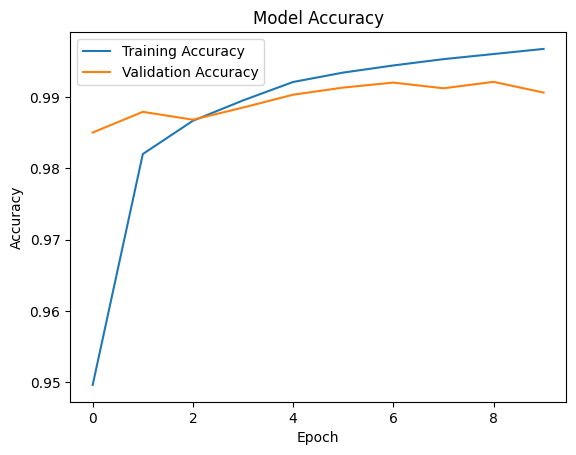

In [55]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

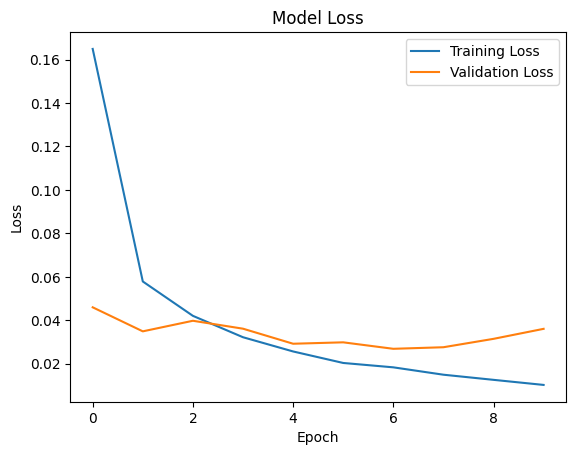

In [56]:
# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 9. Model Predictions and Evaluation
### Confusion Matrix and Classification Report:
This helps us understand which digits the model predicts well and where it makes errors.

In [57]:
# Making predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


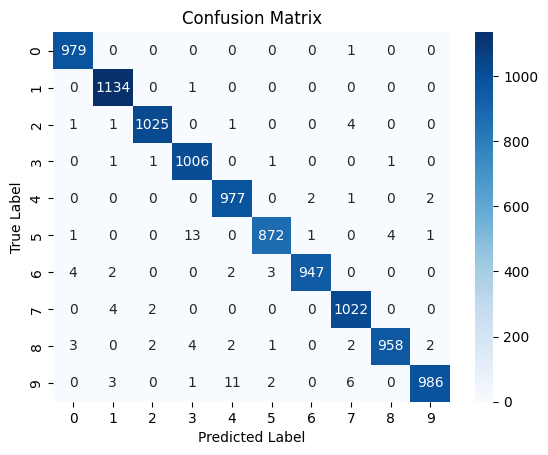

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Observations:
* The confusion matrix shows counts of correctly and incorrectly classified digits.

In [59]:
# Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Observations:
* The classification report provides precision, recall, and F1-score, which are useful for understanding the model’s effectiveness per digit.

## 10. Sample Predictions Visualization
Displaying some example predictions alongside the actual labels to visually verify model performance.

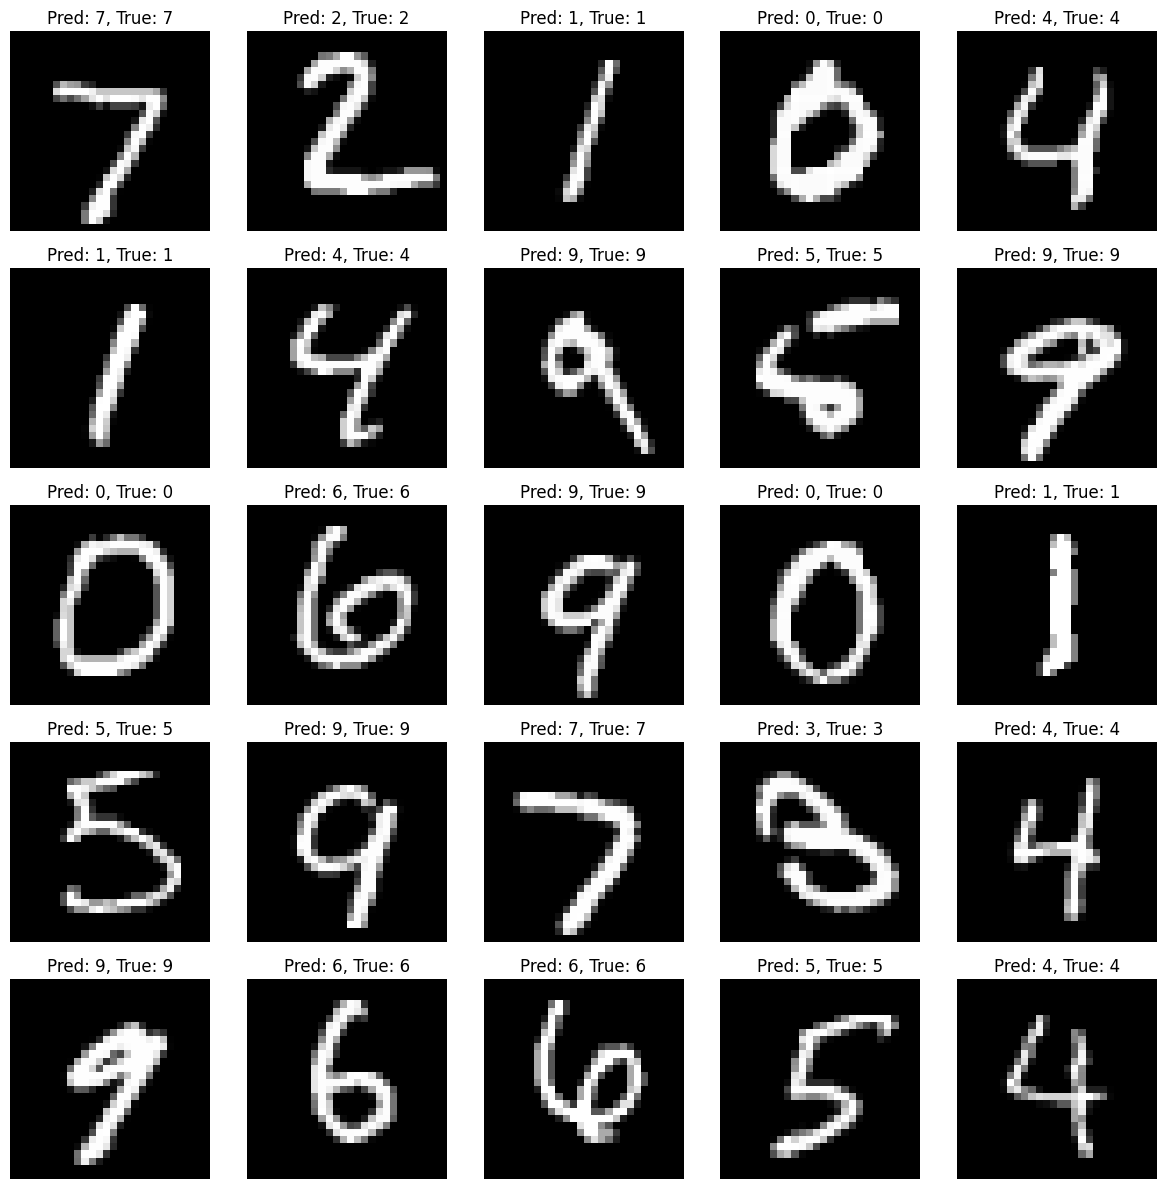

In [61]:
# Plotting predictions
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
for i in range(25):
    ax[i//5, i%5].imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f"Pred: {y_pred[i]}, True: {y_true[i]}")
    ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

## Summary
In this project, we built a CNN model using TensorFlow and Keras for classifying hand-written digits. We preprocessed the data by reshaping and normalizing it, and built a CNN architecture that uses Conv2D layers for feature extraction, MaxPooling for size reduction, Flatten and Dense layers for decision-making, and Dropout to avoid overfitting.

TensorFlow and Keras libraries are chosen for their simplicity and efficiency in creating neural networks. Seaborn and Matplotlib help visualize results, while Sklearn provides tools for evaluating model performance with confusion matrix and classification report.

Our CNN achieved good accuracy on the test set, showing it’s effective for digit classification. This project can be extended with more data or advanced tuning techniques for improved performance.